In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv


from pathlib import Path

env_path = Path('..') / 'config.env'
load_dotenv(dotenv_path=env_path)
dataset_dir = os.getenv("dataset_directory")
mlhd_directory = dataset_dir + '/raw/MLHD+'


In [81]:
users_all = pd.read_csv(mlhd_directory + '/MLHD_demographics.csv', sep='\t')

In [46]:
users_all

,uuid,age,country,gender,playcount,age_scrobbles,user_type,registered,firstscrobble,lastscrobble
0,dfb7ea9d-6e4f-48e4-96f6-59abcc207d55,30.0,AT,n,42622,3783,user,1035849600,1138630578,1362652343
1,a89cb9c5-ba84-424e-8950-16657bb6f7af,35.0,US,m,182118,3862,subscrib,1035849600,1130274207,1369498564
2,dde6c339-c256-43f1-94e8-02f4043abdf9,35.0,UK,m,40668,3727,user,1035849600,1108340306,1357866969
3,44d70878-6e9a-432f-831d-179e8354f448,40.0,DK,n,74916,3874,user,1035849600,1368342035,1126011087
4,e553ab79-5e93-48fc-aa63-1c4319cafd23,NaN,SE,n,49383,3730,user,1035849600,1189263203,1357317882
...,...,...,...,...,...,...,...,...,...,...
582698,f6c11893-4b9c-46da-8512-b30da1c238c1,NaN,NaN,m,16015,731,user,1317345850,1317346214,1380475995
582699,d65baf1a-62bf-4b73-b394-e2ad0c15dce5,26.0,BR,m,53667,731,user,1317365545,1321930518,1380502223
582700,de3b639b-5e0e-49f2-a61c-c62f8e045422,NaN,SG,f,13471,731,user,1317384336,1317385297,1380531095
582701,3bf52435-6c8b-45e1-83dc-0eade3924bf6,27.0,HU,m,17726,731,user,1317385588,1317460141,1380572449


In [47]:
print(f'Average first scrobble: {pd.to_datetime(users_all["firstscrobble"].mean(), unit="s")}')
print(f'Average last scrobble: {pd.to_datetime(users_all["lastscrobble"].mean(), unit="s")}')

Average first scrobble: 2009-03-13 15:44:20.238986254
Average last scrobble: 2012-11-26 01:10:56.769501686


<Axes: title={'center': 'Last scrobble year distribution'}, xlabel='lastscrobble'>

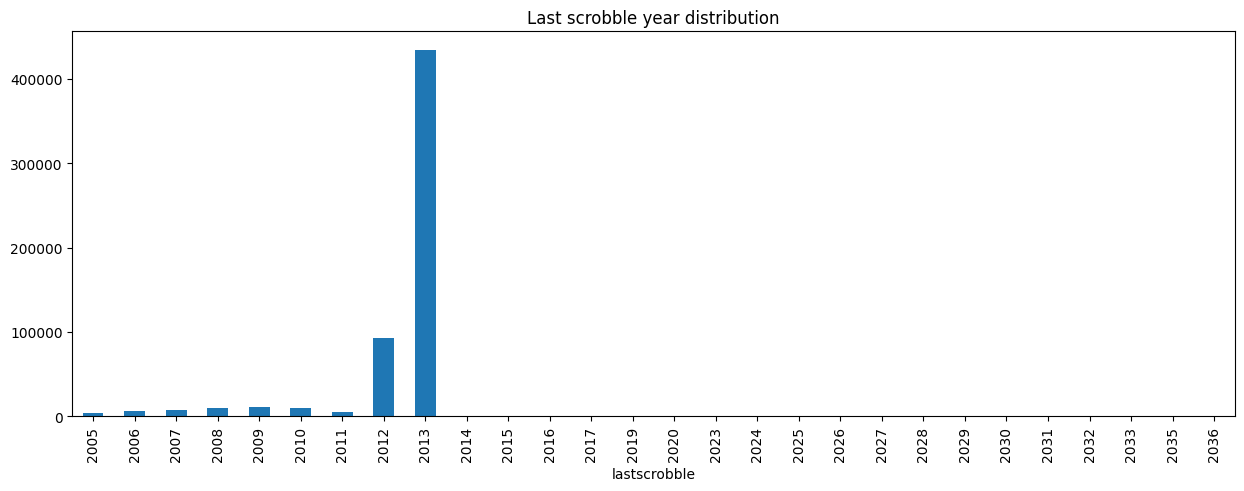

In [85]:
pd.to_datetime(users_all['lastscrobble'], unit='s').dt.year.value_counts().sort_index().plot(kind='bar', figsize=(15, 5), title='Last scrobble year distribution')

In [ ]:
data_collection_date = pd.to_datetime('2014-01-01')
start_date = pd.to_datetime('2010-12-31')
end_date = pd.to_datetime('2013-01-01')
#users['age'] is the age at datacollection 
#users['registered'] is the date of registration in Unix
#Assume that everyones birthday is the 1st of Jan
users_all['age_at_start'] = users_all['age'] - (data_collection_date - start_date).days // 365
users_all['age_at_signup'] = users_all['age'] - (data_collection_date - pd.to_datetime(users_all['registered'], unit='s')).dt.days // 365

In [104]:
users_all[users_all['age_at_signup']>12]['age_at_signup'].value_counts().sort_index()

age_at_signup
13.0      7933
14.0     19304
15.0     33475
16.0     43461
17.0     46973
         ...  
107.0      154
108.0      138
109.0      122
110.0       69
111.0       44
Name: count, Length: 99, dtype: int64

In [105]:
users_all[users_all['age'] < 18].shape[0]

13121

In [111]:
# users_filtered = users_all[(users_all['age_scrobbles'] > 1500) & (users_all['playcount'] > 1000)]
users_filtered = users_all[(pd.to_datetime(users_all['firstscrobble'], unit="s") <= start_date) & (pd.to_datetime(users_all['lastscrobble'], unit="s") >= end_date)]

In [112]:
print(users_filtered[(users_filtered['age_at_start'] < 18) & (users_filtered['age_at_start'] > 12)].shape[0])

44682


In [113]:
print(users_filtered[(users_filtered['age_at_start'] < 18) & (users_filtered['age_at_start'] > 12)].value_counts('age_at_start').sort_index())

age_at_start
13.0     1375
14.0     3824
15.0     8134
16.0    13178
17.0    18171
Name: count, dtype: int64


<Axes: xlabel='age_at_start'>

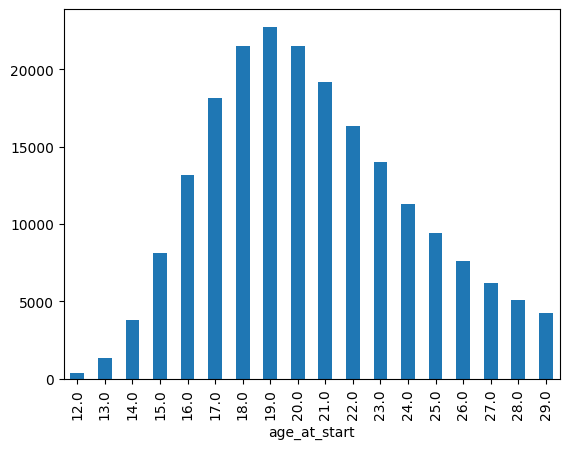

In [110]:
users_filtered[(users_filtered['age_at_start']<30) & (users_filtered['age_at_start']>11)].value_counts('age_at_start').sort_index().plot(kind='bar')